In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
###### NO HACER CASO ########
## Estos datos son un caos y no hay tantos participantes

'''    
### Datos del bucle que falló pero que creo que se han guardado  

f = open('crossfit2.txt', 'r')
cross = f.read()
cross   

'''

# Cargar los datos


In [3]:
### Datos de los primeros participantes

df1 = pd.read_csv('primera_muestra.csv')
#df4 = pd.read_csv('muestra2_341.csv') # Muestra añadida a ultima hora que me añade registros
df3 = pd.read_csv('muestra3_51-60.csv')

### Datos de Alfonso

pick = pd.read_pickle('nestor.p') #De Alfonso

In [4]:
# Transformo el pickle en data frame

columnas = ['nombre', 'apellido', 'edad', 'altura', 'peso',
           'back_squat', 'clean_jerk', 'snatch',
           'deadlift', 'fight_gone_bad', 'pull_ups',
           'fran', 'grace', 'helen', 'filthy', 'sprint', 'run_5k',
           'puntos', 'wod_1', 'wod_2', 'wod_3',
           'wod_4', 'wod_5']

df2 = pd.DataFrame(pick, 
                columns = columnas)

In [6]:
# Elimino una columna que no es más que el id. Si me interesa la creo cuando concatene todo

df1.drop('Unnamed: 0', axis = 1, inplace = True)
df3.drop('Unnamed: 0', axis = 1, inplace = True)
#df4.drop('Unnamed: 0', axis = 1, inplace = True)

KeyError: "['Unnamed: 0'] not found in axis"

In [7]:
# Concateno los dataframa

df = pd.concat([df1, df4, df2, df3], axis = 0)
df = df.reset_index()
df.drop('index', axis = 1, inplace = True)

In [18]:
df.loc[:,'puntos'].describe()

count      1188.000000
mean      21313.829125
std       76208.717111
min          64.000000
25%        2996.750000
50%        6003.000000
75%       20932.250000
max      548388.000000
Name: puntos, dtype: float64

In [28]:
df3.loc[df3['puntos']>10000,:]

,nombre,apellido,edad,altura,peso,back_squat,clean_jerk,snatch,deadlift,fight_gone_bad,...,helen,filthy,sprint,run_5k,puntos,wod_1,wod_2,wod_3,wod_4,wod_5
0,Johnny,Anthony,21.0,182.882224,89.812211,176.902840,127.007167,102.059330,206.386646,--,...,--,--,1:05,20:39,19870.0,12:28,720,128,201,14:18
1,Carlos,Labarthe,26.0,175.000000,83.915450,NaN,NaN,NaN,NaN,--,...,--,--,--,--,19870.0,13:20,751,136,213,15:48
2,Marco,Almeida,31.0,185.000000,96.000000,81.647464,126.000000,47.627688,104.327316,--,...,--,--,--,--,19877.0,12:23,690,133,235,16:18
3,Richie,Vega,40.0,NaN,83.915450,NaN,NaN,NaN,NaN,--,...,--,--,--,--,19880.0,13:10,705,136,229,15:02
4,Dylan,Langlois,35.0,172.721853,83.008255,192.778735,133.811122,111.131271,229.066497,--,...,--,--,--,--,19893.0,13:13,696,146,204,14:43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,Alan,Bates,44.0,180.341853,88.451420,192.778735,129.275152,111.131271,213.190601,418,...,7:30,--,1:01,19:05,22998.0,13:00,694,129,203,15:21
439,Franklyn,Munera,40.0,177.000000,78.018688,158.758959,122.471197,99.791345,190.510750,--,...,--,--,--,--,23000.0,11:44,748,117,200,14:47
440,Chad,Morales,33.0,177.801853,88.451420,210.922616,145.151048,115.667241,219.994557,389,...,--,--,--,--,23001.0,14:08,777,136,235,15:37
441,Matthew,Forner,38.0,187.962224,97.523360,161.026944,131.543137,95.255375,190.510750,--,...,--,--,57:00,19:36,23010.0,12:09,716,118,235,16:50


In [8]:
df.shape

(1188, 23)

In [7]:
# Elimino duplicados

df.drop_duplicates(keep='first', inplace=True)
df.shape

(1226, 23)

# Incluir nans, función para pasar los minutos a segundos y transformación de las variables

In [8]:
# Reemplazar los vacíos por nans

df.replace('--', np.nan, inplace = True)

In [ ]:
# Ver cuantos valores tengo en cada variable en porcentaje y total

print(df.isnull().sum()/len(df)*100)
print(df.isnull().sum())

In [ ]:
''' Tengo variables con muchos nans, como filthy, sprint y de ese estilo. Voy a hacer 2 data frame, uno donde
elimino esas variables y hago un remix entre borrar nans de columnas y filas, y otro donde estudiaré
las características de los deportistas que sí tienen esos datos, es decir, df2 voy a eliminar filas, no 
variables'''

In [9]:
# Función para transformar tiempo

def tiempo(x):
    
    try:
        if type(x) == str:

            minutos = x.split(':')[0]
            minutos = float(minutos)
            minutos = minutos*60
            segundos = x.split(':')[1]
            segundos = float(segundos)

            time = minutos + segundos

        else:
            time = x
            
    except:
        time = float(x)
    
    return time

In [10]:
df['fran'] = df['fran'].apply(lambda x:tiempo(x))
df['wod_1'] = df['wod_1'].apply(lambda x:tiempo(x))
df['wod_3'] = df['wod_3'].apply(lambda x:tiempo(x))
df['wod_4'] = df['wod_4'].apply(lambda x:tiempo(x))
df['wod_5'] = df['wod_5'].apply(lambda x:tiempo(x))

In [11]:
# Copia para borrar cosas diferentes

df2 = df.copy()

## Tratamiento df

In [12]:
# Empiezo con df a borrarcolumnas.
# columnas a borrar --> run_5k, sprint, filthy, helen, grace, pull_ups, fight_gone_bad
# Tienen demasiados nans

df.drop(['run_5k', 'sprint', 
         'filthy', 'helen', 
         'grace', 'pull_ups', 
         'fight_gone_bad', 
         'wod_3', 'wod_4'],
        
        axis = 1, 
        inplace = True)

In [ ]:
# Estudio las filas con los nans
# Estas son las filas que voy a eliminar de mi df. En cambio, estos participantes los estudiaré en df2

df.loc[df['clean_jerk'].isna() & df['back_squat'].isna() & df['snatch'].isna() & df['deadlift'].isna() & df['fran'].isna(),:]

In [13]:
# Elimino filas que al menos tengan 13 no nans.

df.dropna(axis = 0, thresh = 13, inplace = True)

In [ ]:
print(df.isnull().sum())

In [ ]:
df.shape

### Imputación de los datos de df

In [14]:
# Reseteo el índice para hacer luego el merge

df.reset_index(inplace = True, drop = True) 

In [15]:
# Creo data frame para imputar con variables numericas y el nombre de las columnas para transformar array a datafr
df_imputar = df.iloc[:,2:]
columnas_imp = df_imputar.columns

# Guardo en dataframe nombre y el apellido
nombre = df.iloc[:,:2] 

In [16]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=4)
df_imputar = imputer.fit_transform(df_imputar)

# Guardo el array en un data frame
df_imputar = pd.DataFrame(df_imputar, columns = columnas_imp)

In [17]:
# Creo las columnas de indice para el merge

nombre['index'] = nombre.index
df_imputar['index'] = df_imputar.index

############# cf ya es una base de datos sin nan #######################

cf = pd.merge(left = nombre, right = df_imputar, on = 'index')

In [18]:
cf.shape

(729, 15)

## Tratamiento df2

In [19]:
# Transformo las variables con tiempo de mi df2

df2['fran'] = df2['fran'].apply(lambda x:tiempo(x))
df2['grace'] = df2['grace'].apply(lambda x:tiempo(x))
df2['helen'] = df2['helen'].apply(lambda x:tiempo(x))
df2['run_5k'] = df2['run_5k'].apply(lambda x:tiempo(x))
df2['wod_1'] = df2['wod_1'].apply(lambda x:tiempo(x))
df2['wod_3'] = df2['wod_3'].apply(lambda x:tiempo(x))
df2['wod_4'] = df2['wod_4'].apply(lambda x:tiempo(x))
df2['wod_5'] = df2['wod_5'].apply(lambda x:tiempo(x))

In [20]:
# En df2 elimino bastantes mas filas. Me quedo con 354, la mitad que cf.

df2.dropna(axis = 1, thresh = 250, inplace = True)
df2.dropna(axis = 0, thresh = 18, inplace = True)

### Imputación de datos en df2

In [21]:
df2.reset_index(inplace = True, drop = True)

In [22]:
# Data frame con los datos numericos y  el nombre de sus columnas
df2_imputar = df2.iloc[:,2:]
columnas_imp = df2_imputar.columns

# Guardo en dataframe nombre y el apellido
nombre = df2.iloc[:,:2] 


In [23]:
# Imputacion

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=4) #vuelvo a crear el objeto para saber lo que hago
df2_imputar = imputer.fit_transform(df2_imputar)

# Lo guardo en data frame
df2_imputar = pd.DataFrame(df2_imputar, columns = columnas_imp)

In [24]:
# Creo las columnas de indice para el merge
nombre['index'] = nombre.index
df2_imputar['index'] = df2_imputar.index

############### cf2 ya es una base de datos sin nan #######################

cf2 = pd.merge(left = nombre, right = df2_imputar, on = 'index')

In [25]:
cf2.drop('index', inplace = True, axis=1)

In [26]:
cf2.shape

(406, 20)

# OUTLIERS

###### Outliers en cf1

In [27]:
def libras_kg(peso):
    
    try:
        if peso.split()[1] == 'lb':
            peso = float(peso.split()[0])
            kg = peso/2.2046

        elif peso.split()[1] == 'kg':
            kg = peso.split()[0]
        
    except:
        kg = np.nan

    return kg

In [ ]:
# Tengo outliers en estas 4 variables

sns.pairplot(cf.loc[:,['altura', 'clean_jerk', 'snatch', 'fran']])

In [ ]:
# Sergio mide 180
# Martin mide 176
# Adrian mide 174

cf.loc[cf['altura']>250,:]

In [ ]:
# Luke está mal
# Dex se les ha colado un 0 y un 5 en el clean y en el snatch respectivamente (335lb clean/228lb snatch)
# Viktor está mal

cf.loc[cf['clean_jerk']>250,:]

In [ ]:
# Este se elimina

cf.loc[cf['fran']>2000,:]

In [ ]:
cf.loc[cf['altura']<150,:]

In [28]:
# Fallo de la pagina
cf.loc[cf['apellido'] =='Briceno' ,'altura'] = 180
cf.loc[cf['apellido'] =='Gonzalez' ,'altura'] = 176
cf.loc[cf['apellido'] =='Román Rubio' ,'altura'] = 174

# Fallo en clean y snatch. He sacado estos kg de la página de los games y usando la función de extracción de datos
cf.loc[cf['apellido'] == 'Hopkins', 'clean_jerk'] = 151.95500317517917
cf.loc[cf['apellido'] == 'Hopkins', 'snatch'] = 103.42012156400253

# Elimino que están mal
cf.drop(121, axis = 0, inplace = True)
cf.drop(262, axis = 0, inplace = True)
cf.drop(716, axis = 0, inplace = True)

# Elimino la columna indice
cf.drop('index', axis = 1, inplace = True)

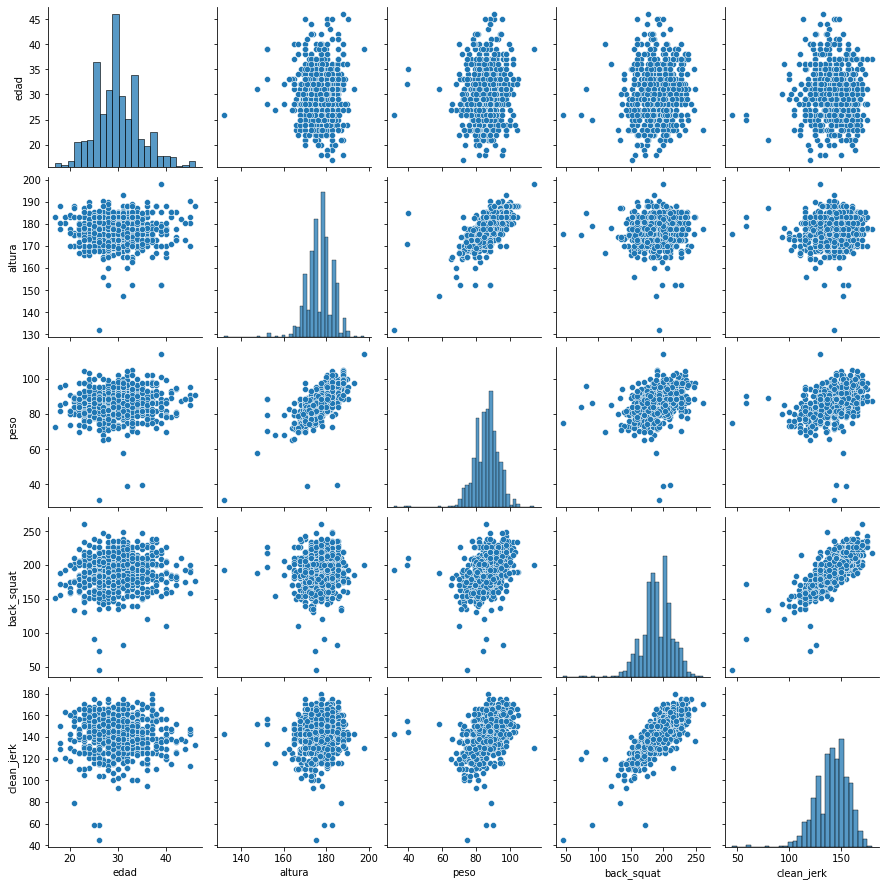

In [29]:
# Este es mi cf definitivo

sns.pairplot(cf.iloc[:,:7])

##### Outliers en cf2
Variables con fallo de dedo:
- Altura
- Clean_jerk
- Snatch
- Fran
- Grace
- Helen
- Run 5k

In [ ]:
# Grafico los 5 wods que he visto algo raro
# Efectivamente, los wod 3 y 4 son raros porque a veces tengo repes y otras tiempo. Las elimino

sns.pairplot(cf2.iloc[:,15:])

In [30]:
cf2.drop('wod_3', axis = 1, inplace = True)
cf2.drop('wod_4', axis = 1, inplace = True)

In [ ]:
# Estudio los outliers que parecen estar en estas variables

sns.pairplot(cf2.loc[:,['altura', 'clean_jerk', 'snatch', 'grace', 'helen', 'fran', 'run_5k']])

#### Filtros para ver los outliers

In [31]:
cf2.loc[cf2['run_5k']>2000,:]

,nombre,apellido,edad,altura,peso,back_squat,clean_jerk,snatch,deadlift,pull_ups,fran,grace,helen,run_5k,puntos,wod_1,wod_2,wod_5
399,Chia Le,Liao,24.0,170.0,71.0,5.0,0.907194,0.453597,5.0,2.0,86400.0,21600.0,43200.0,2700.0,22935.0,769.0,792.0,861.0


In [32]:
cf2.loc[cf2['snatch']>400,:]

,nombre,apellido,edad,altura,peso,back_squat,clean_jerk,snatch,deadlift,pull_ups,fran,grace,helen,run_5k,puntos,wod_1,wod_2,wod_5
103,Dex,Hopkins,32.0,187.962224,102.05933,219.994557,1519.550032,1036.469201,233.602468,74.0,134.0,87.0,430.0,1457.0,2267.0,643.0,827.0,728.0


In [33]:
cf2.loc[cf2['helen']>1000,:]

,nombre,apellido,edad,altura,peso,back_squat,clean_jerk,snatch,deadlift,pull_ups,fran,grace,helen,run_5k,puntos,wod_1,wod_2,wod_5
72,Tom,Lengyel,29.0,169.0,74.843509,175.000000,137.000000,116.000000,200.000000,60.0,126.0,600.0,1200.0,1229.0,1656.0,633.0,894.0,722.0
199,Leonardo,Veras,28.0,187.0,94.000000,136.079107,115.667241,92.987390,179.170825,30.0,210.0,120.0,1300.0,1131.0,4810.0,633.0,819.0,737.0
399,Chia Le,Liao,24.0,170.0,71.000000,5.000000,0.907194,0.453597,5.000000,2.0,86400.0,21600.0,43200.0,2700.0,22935.0,769.0,792.0,861.0


In [34]:
cf2.loc[(cf2['snatch']<60) & (cf2['clean_jerk']<60),:]

,nombre,apellido,edad,altura,peso,back_squat,clean_jerk,snatch,deadlift,pull_ups,fran,grace,helen,run_5k,puntos,wod_1,wod_2,wod_5
95,Damian,Conciatori,26.0,175.261853,74.843509,45.359702,45.359702,36.287762,45.359702,60.0,140.0,107.0,497.0,1203.25,2116.0,598.0,922.0,695.0
399,Chia Le,Liao,24.0,170.000000,71.000000,5.000000,0.907194,0.453597,5.000000,2.0,86400.0,21600.0,43200.0,2700.00,22935.0,769.0,792.0,861.0


In [35]:
# En vez de eliminar estos 2, lo que voy es a esperar a aplicar logaritmos para ver si se suaviza la dif

cf2.loc[cf2['clean_jerk']<60,:]

,nombre,apellido,edad,altura,peso,back_squat,clean_jerk,snatch,deadlift,pull_ups,fran,grace,helen,run_5k,puntos,wod_1,wod_2,wod_5
95,Damian,Conciatori,26.0,175.261853,74.843509,45.359702,45.359702,36.287762,45.359702,60.0,140.0,107.0,497.00,1203.25,2116.0,598.0,922.0,695.0
292,James,Thomas,26.0,183.000000,90.000000,172.000000,58.967613,100.000000,206.000000,56.0,165.0,104.0,463.25,1130.00,20276.0,739.0,724.0,873.0
399,Chia Le,Liao,24.0,170.000000,71.000000,5.000000,0.907194,0.453597,5.000000,2.0,86400.0,21600.0,43200.00,2700.00,22935.0,769.0,792.0,861.0


In [38]:
cf2.loc[cf2['fran']> 300,:]

,nombre,apellido,edad,altura,peso,back_squat,clean_jerk,snatch,deadlift,pull_ups,fran,grace,helen,run_5k,puntos,wod_1,wod_2,wod_5
297,Shane,Lloyd,35.0,182.882224,92.98739,201.850676,147.419033,122.471197,242.674408,48.75,383.0,142.0,519.75,1421.0,20405.0,779.0,734.0,976.0


#### Corrección o eliminación de los outliers

In [36]:
# Borro al chino tirillas
cf2.drop(399, axis = 0, inplace = True)

# Fallo de la pagina. Le han puesto los centimetros que mide en pulgadas. Mide 174 cm
cf2.loc[cf2['altura']>300,'altura'] = 174

# Corrijo al flipao
cf2.loc[cf2['snatch']>400,'snatch'] = 136.469201
cf2.loc[cf2['snatch']>400, 'clean_jerk'] = 151.9550032

# Otro participante con la coma en otro sitio
cf2.loc[cf2['clean_jerk']>500,'clean_jerk'] = 151.9550032

# Elimino estos dos participantes. Me contaminan demasiado la muestra y prefiero perder 2 casos muy atípicos
cf2.drop(72, axis = 0, inplace = True)
cf2.drop(199, axis = 0, inplace = True)

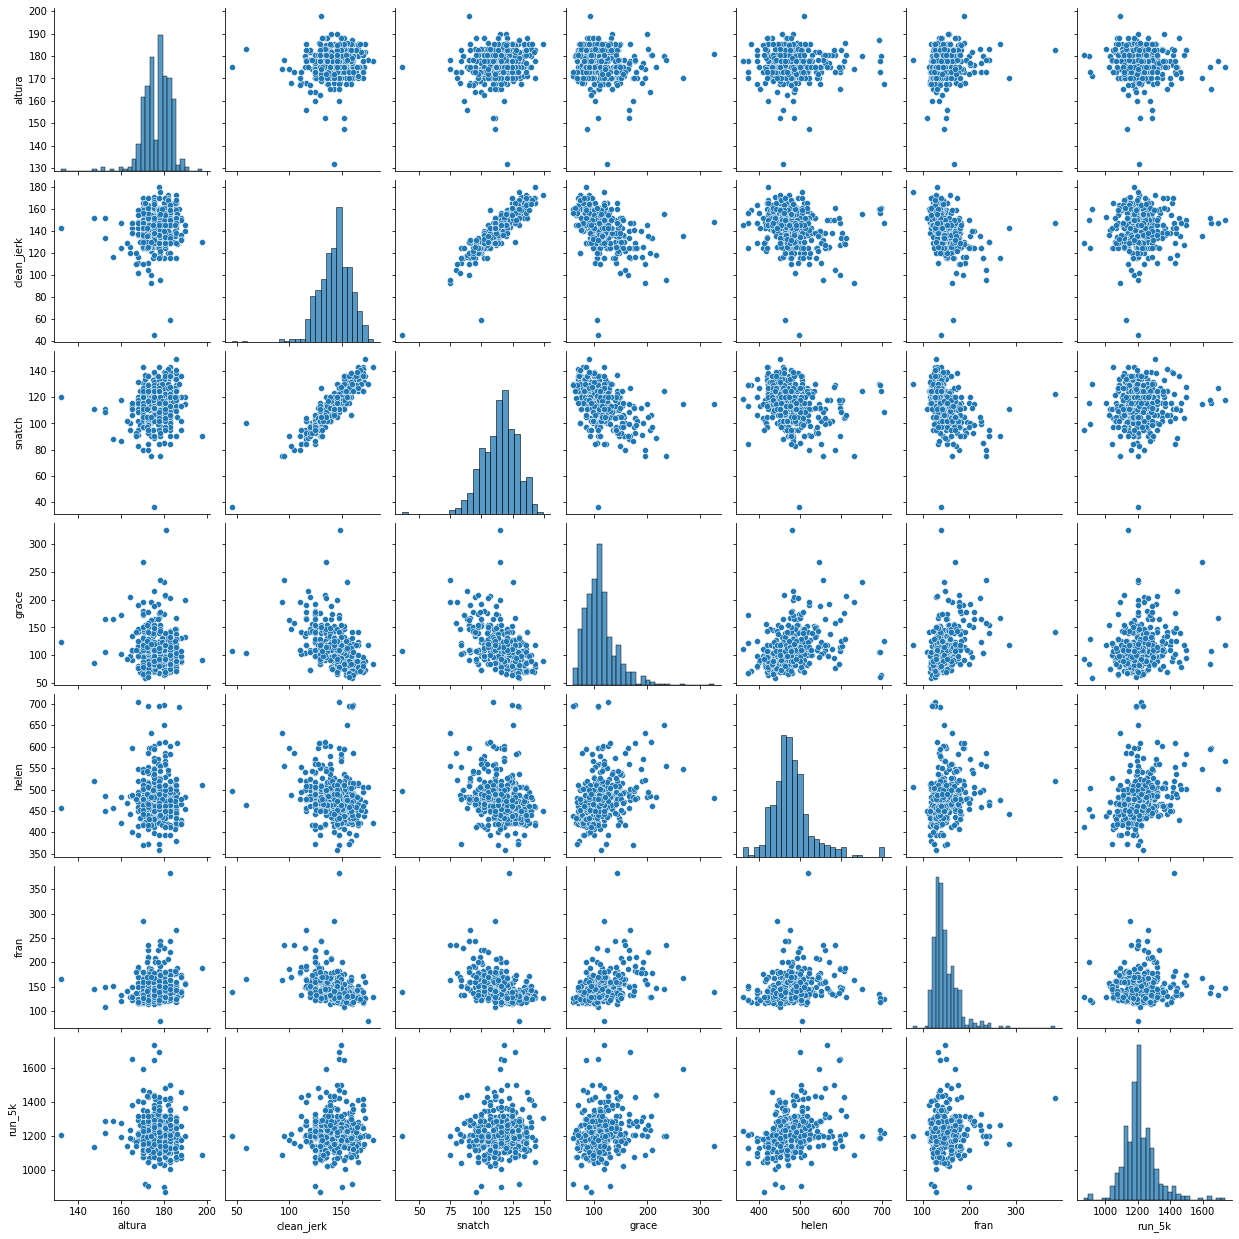

In [37]:
# Esta es la muestra definitiva de cf2

sns.pairplot(cf2.loc[:,['altura', 'clean_jerk', 'snatch', 'grace', 'helen', 'fran', 'run_5k']])

# Conclusiones
- Estos son mis cf y cf2 definitivos en los que voy a basar mi análisis
- La variable edad la voy a hacer rangos ya que, como se intuye en los gráficos, no es demasiado explicativa
- Tengo algún outlier que son muy bajos o pesan muy poco. Los dejaré y aplicaré logaritmos que suavicen esos outliers, ya que me parece interesante tenerlos en cuenta
- Las variables se asemejan a una distribución normal
- Las variables wod_3 y wod_4 tenía diferentes formatos. En unos deportistas tenía el tiempo y en otros tenía las repeticiones. He optado por eliminar esas dos variables ya que me complicaban el análisis.
- En la variable altura tengo escalones extraños. Esto debe ser por los decimales. Al aplicar logaritmos espero se corrija

In [39]:
cf.to_csv('cf.csv')
cf2.to_csv('cf2.csv')